In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.dates as mdates
%matplotlib inline
from matplotlib.dates import DateFormatter
mpl.rcParams['figure.figsize'] = (15,5)
sns.set(rc={'figure.figsize':(15, 5)})

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#reading file
df = pd.read_csv("/content/drive/My Drive/IERC ARF-ASHRAE/Data/IERC HP Data/HP.csv")
df["Timestamp"] = pd.to_datetime(df["Timestamp"], format = "%Y-%m-%d  %H:%M:%S")
df.set_index(["Timestamp"], inplace = True)
df.head()

,year,month,day,hour,Ave_Tout(C),Heat_EnCon(Wh),Heat_EnPro(Wh),HW_EnCon(Wh),HW_EnPro(Wh),Comb_EnCon(Wh),Comb_EnPro(Wh),COP_Heat,COP_HW
Timestamp,,,,,,,,,,,,,
2019-01-10 12:00:00,2019.0,1,10,12.0,10.937500,0.0,0.0,247.0,747.0,247.0,747.0,NaN,3.024291
2019-01-10 13:00:00,2019.0,1,10,13.0,10.245614,1287.0,5813.0,0.0,0.0,1287.0,5813.0,4.516706,NaN
2019-01-10 14:00:00,2019.0,1,10,14.0,10.166667,1103.0,4694.0,0.0,0.0,1103.0,4694.0,4.255666,NaN
2019-01-10 15:00:00,2019.0,1,10,15.0,10.150000,1173.0,4818.0,0.0,0.0,1173.0,4818.0,4.107417,NaN
2019-01-10 16:00:00,2019.0,1,10,16.0,9.416667,1156.0,4700.0,0.0,0.0,1156.0,4700.0,4.065744,NaN


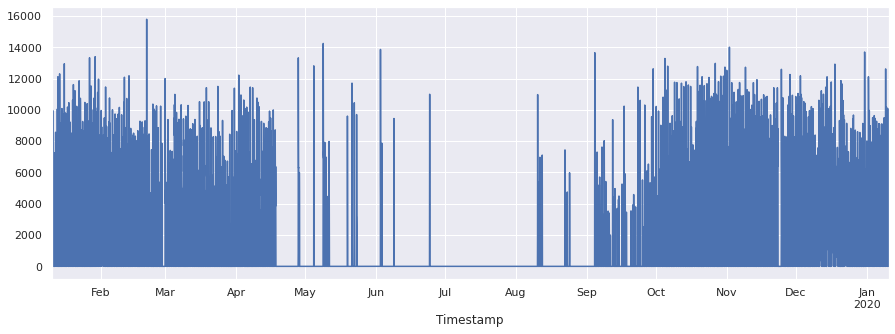

In [ ]:
df["Comb_EnPro(Wh)"].plot()

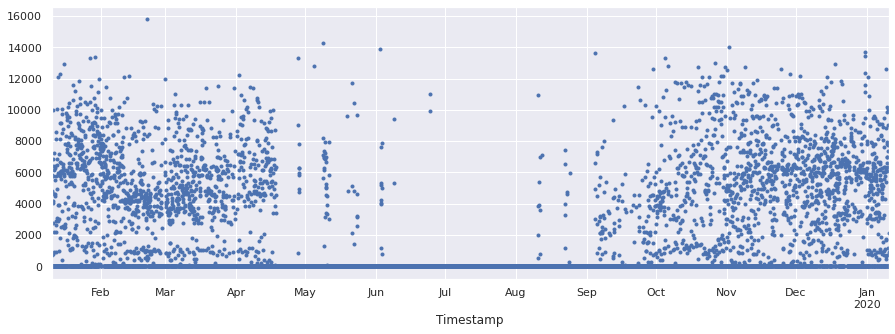

In [ ]:
df["Comb_EnPro(Wh)"].plot(marker = ".", linestyle = "None")

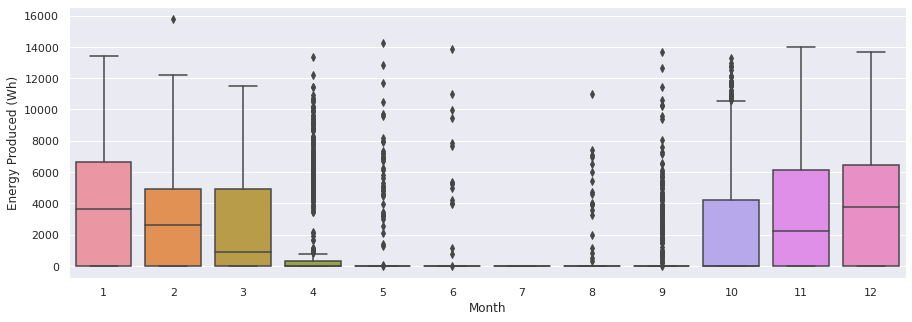

In [ ]:
sns.boxplot(data = df, x = "month", y = "Comb_EnPro(Wh)")
plt.xlabel("Month")
plt.ylabel("Energy Produced (Wh)")
plt.savefig("boxplot.png", dpi = 600)

In [ ]:
from google.colab import files

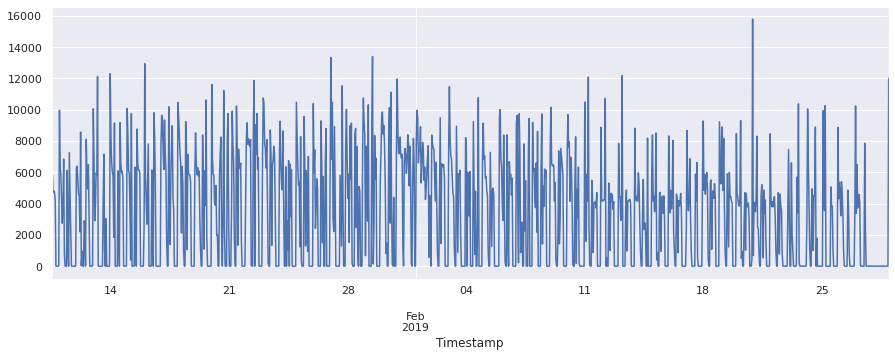

In [ ]:
df.loc["2019-01": "2019-02", "Comb_EnPro(Wh)"].plot()

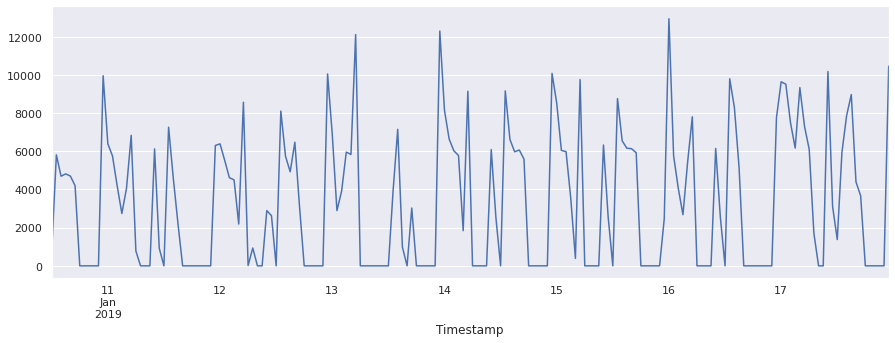

In [ ]:
df.loc["2019-01-10": "2019-01-17", "Comb_EnPro(Wh)"].plot()

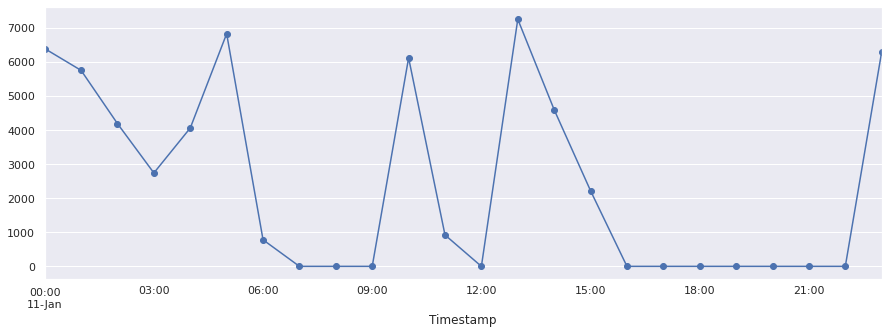

In [ ]:
df.loc["2019-01-11":"2019-01-11", "Comb_EnPro(Wh)"].plot(marker = "o")

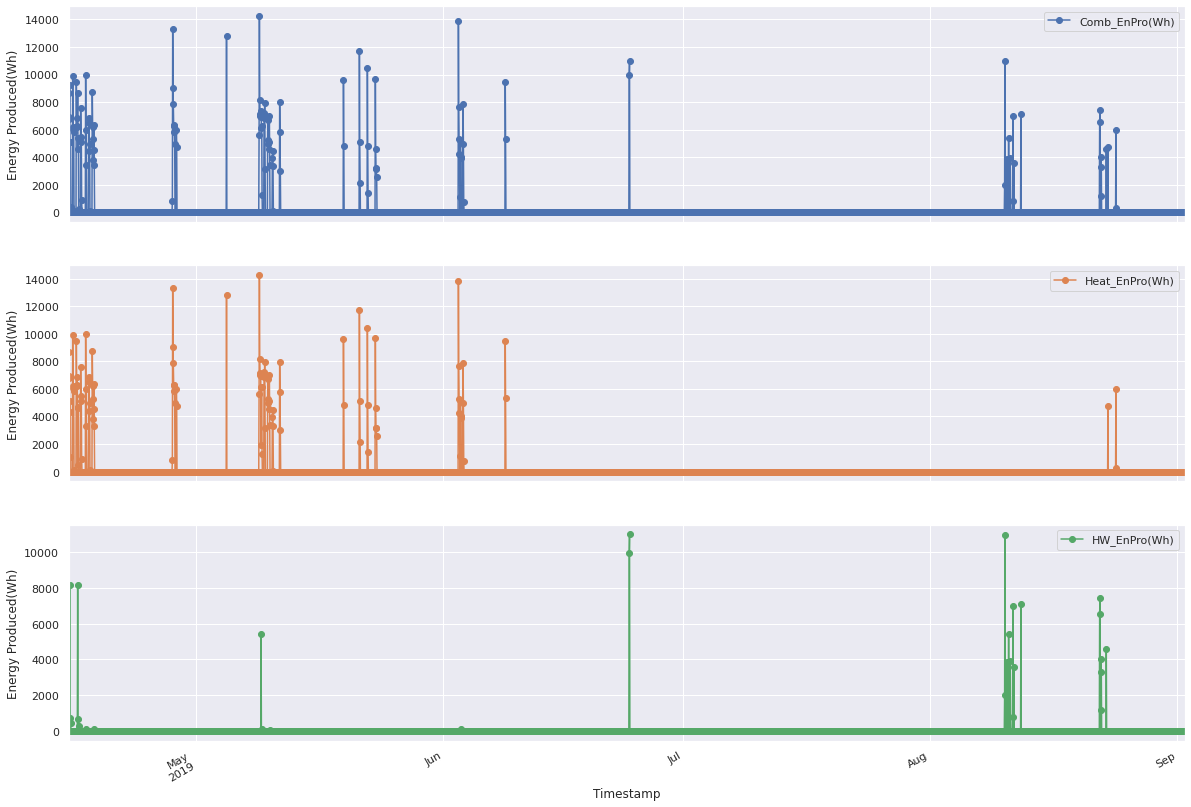

In [ ]:
cols_plot = ["Comb_EnPro(Wh)", "Heat_EnPro(Wh)", "HW_EnPro(Wh)"]
axes = df.loc["2019-04-15":"2019-09-01", cols_plot].plot(marker = "o", figsize = (20,15),subplots = True)
for ax in axes:
    ax.set_ylabel("Energy Produced(Wh)")
plt.savefig("Mode of Operation.png", dpi = 1200)

In [ ]:
files.download("Mode of Operation.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

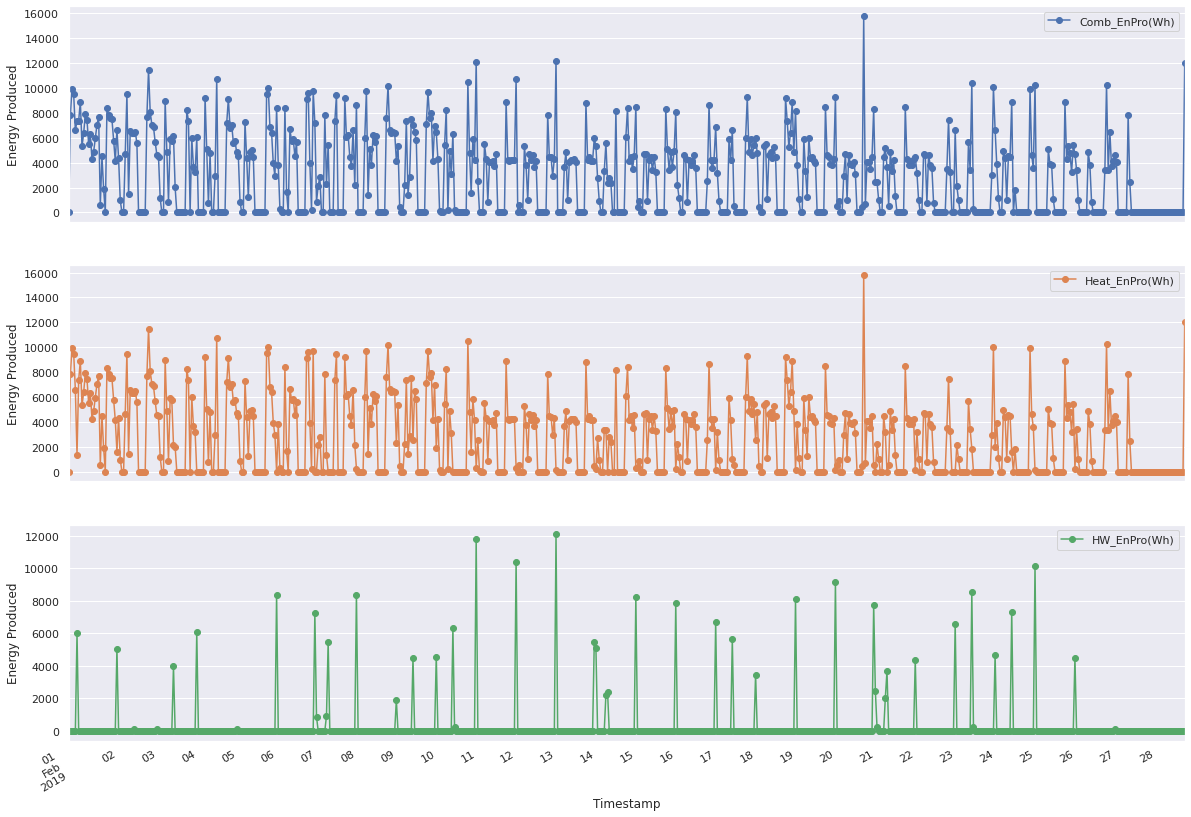

In [ ]:
cols_plot = ["Comb_EnPro(Wh)", "Heat_EnPro(Wh)", "HW_EnPro(Wh)"]
axes = df.loc["2019-02-1":"2019-02-28", cols_plot].plot(marker = "o", figsize = (20,15),subplots = True)
for ax in axes:
    ax.set_ylabel("Energy Produced")

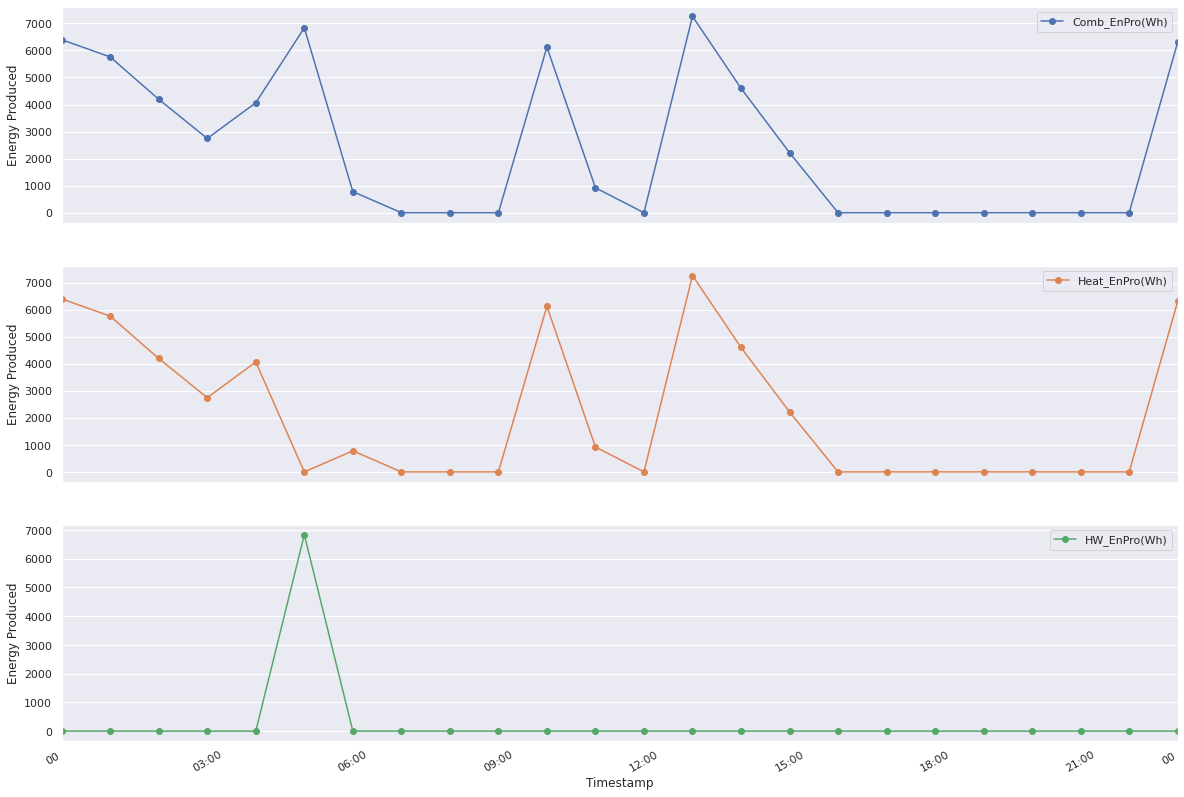

In [ ]:
cols_plot = ["Comb_EnPro(Wh)", "Heat_EnPro(Wh)", "HW_EnPro(Wh)"]
axes = df.loc["2019-01-11":"2019-01-11", cols_plot].plot(marker = "o", figsize = (20,15),subplots = True)
for ax in axes:
    ax.set_ylabel("Energy Produced")
ax.xaxis.set_major_formatter(DateFormatter("%H"))

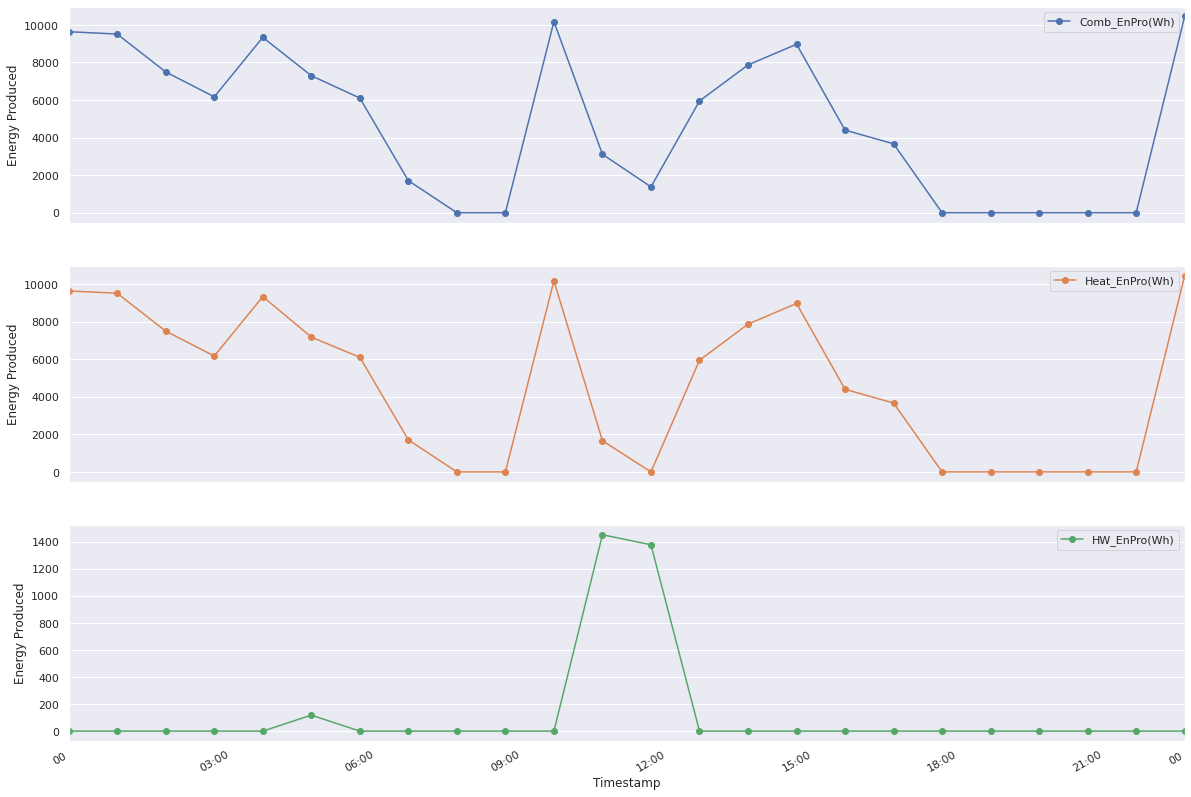

In [ ]:
cols_plot = ["Comb_EnPro(Wh)", "Heat_EnPro(Wh)", "HW_EnPro(Wh)"]
axes = df.loc["2019-01-17":"2019-01-17", cols_plot].plot(marker = "o", figsize = (20,15),subplots = True)
for ax in axes:
    ax.set_ylabel("Energy Produced")
ax.xaxis.set_major_formatter(DateFormatter("%H"))

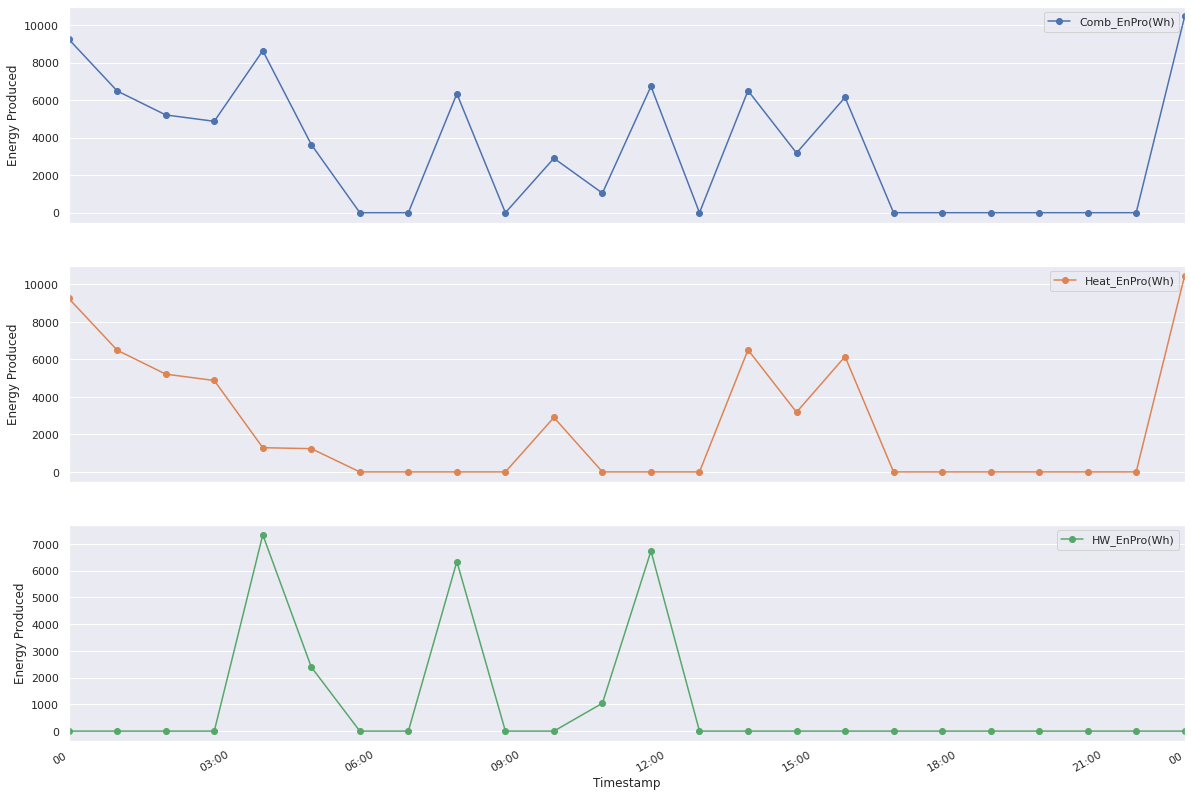

In [ ]:
cols_plot = ["Comb_EnPro(Wh)", "Heat_EnPro(Wh)", "HW_EnPro(Wh)"]
axes = df.loc["2019-01-24":"2019-01-24", cols_plot].plot(marker = "o", figsize = (20,15),subplots = True)
for ax in axes:
    ax.set_ylabel("Energy Produced")
ax.xaxis.set_major_formatter(DateFormatter("%H"))

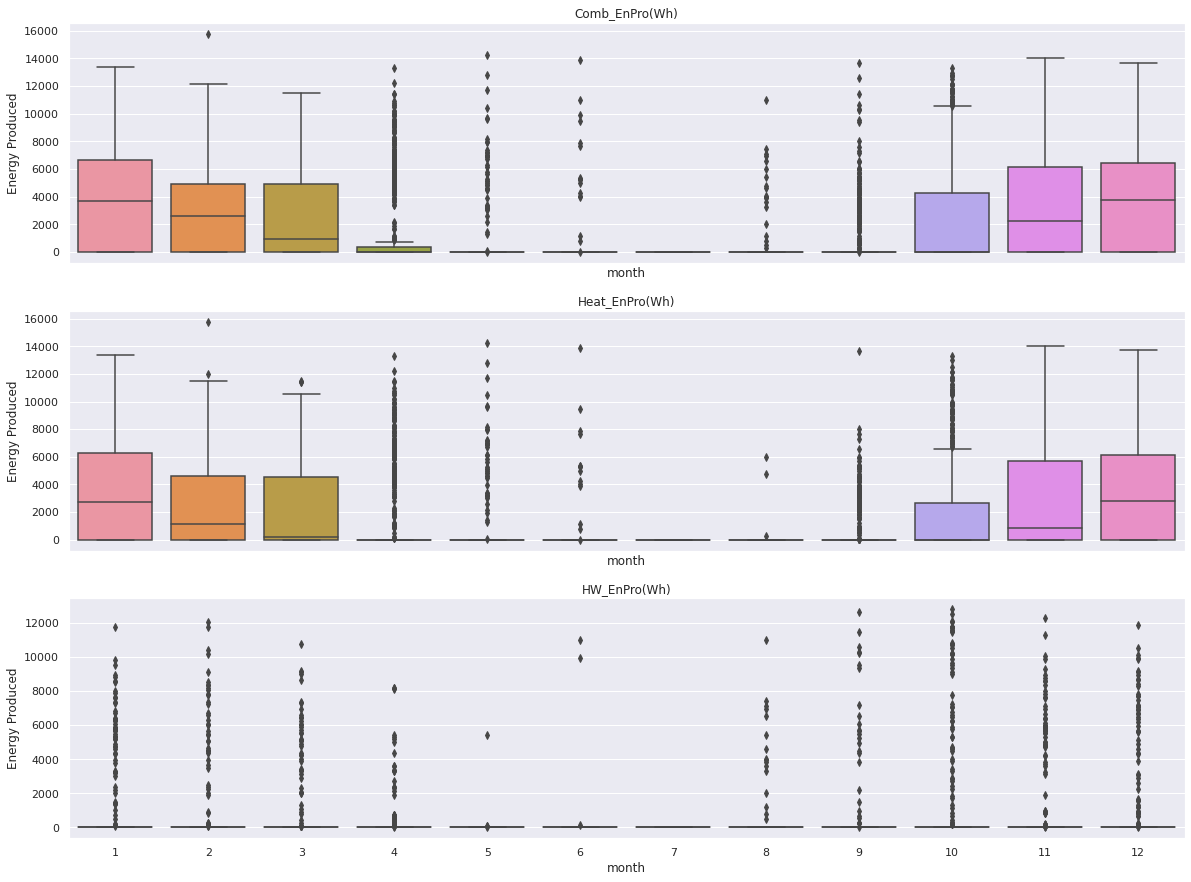

In [ ]:
fig, axes = plt.subplots(3,1, figsize = (20,15), sharex = True)
for name, ax in zip(["Comb_EnPro(Wh)", "Heat_EnPro(Wh)", "HW_EnPro(Wh)"], axes):
    sns.boxplot(data = df, x = "month", y = name, ax = ax)
    ax.set_ylabel("Energy Produced")
    ax.set_title(name)  

In [ ]:
df["COP"] = df["Comb_EnPro(Wh)"]/df["Comb_EnCon(Wh)"]
df["COP"].fillna(0,inplace = True)

In [ ]:
import plotly.express as px
fig = px.line_3d(temp, x="Ave_Tout(C)", y="hour", z="COP")
fig.show()

NameError: ignored

In [ ]:
import plotly.express as px
fig = px.scatter(df, x="Ave_Tout(C)", y="COP", trendline= "ols")
fig.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
HP_mode  = []
for value in df["Heat_EnPro(Wh)"]:
  if value != 0:
    HP_mode.append("Heating")
  else:
    HP_mode.append("Hot water")
df["mode"] = HP_mode

In [ ]:
df["COP_HW"].fillna(0, inplace = True)
df["COP_Heat"].fillna(0,inplace = True)

In [ ]:
temp_range = []
for temp in df["Ave_Tout(C)"]:
  if temp <= 2:
    temp_range.append(" < 2")
  elif  2 < temp <=5:
    temp_range.append("2-5")
  elif temp > 5:
    temp_range.append(">5")
df["temp_range"] = temp_range

In [ ]:
df

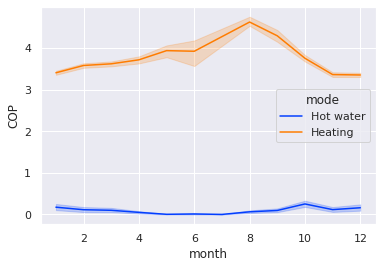

In [ ]:
sns.lineplot(x = "month", y = "COP", data = df, hue = "mode", palette="bright")

In [ ]:
df[df["COP"] < 1]

In [ ]:
df["Ave_Tout(C)"].max()

In [ ]:
df["Ave_Tout(C)"].min()

In [ ]:
df.head()

,year,month,day,hour,Ave_Tout(C),Heat_EnCon(Wh),Heat_EnPro(Wh),HW_EnCon(Wh),HW_EnPro(Wh),Comb_EnCon(Wh),Comb_EnPro(Wh),COP_Heat,COP_HW,COP,mode,temp_range
Timestamp,,,,,,,,,,,,,,,,
2019-01-10 12:00:00,2019.0,1,10,12.0,10.937500,0.0,0.0,247.0,747.0,247.0,747.0,0.000000,3.024291,3.024291,Hot water,>5
2019-01-10 13:00:00,2019.0,1,10,13.0,10.245614,1287.0,5813.0,0.0,0.0,1287.0,5813.0,4.516706,0.000000,4.516706,Heating,>5
2019-01-10 14:00:00,2019.0,1,10,14.0,10.166667,1103.0,4694.0,0.0,0.0,1103.0,4694.0,4.255666,0.000000,4.255666,Heating,>5
2019-01-10 15:00:00,2019.0,1,10,15.0,10.150000,1173.0,4818.0,0.0,0.0,1173.0,4818.0,4.107417,0.000000,4.107417,Heating,>5
2019-01-10 16:00:00,2019.0,1,10,16.0,9.416667,1156.0,4700.0,0.0,0.0,1156.0,4700.0,4.065744,0.000000,4.065744,Heating,>5


In [ ]:
m = df.resample("M").mean()

In [ ]:
m

,year,month,day,hour,Ave_Tout(C),Heat_EnCon(Wh),Heat_EnPro(Wh),HW_EnCon(Wh),HW_EnPro(Wh),Comb_EnCon(Wh),Comb_EnPro(Wh),COP_Heat,COP_HW,COP
Timestamp,,,,,,,,,,,,,,
2019-01-31,2019.0,1.0,20.744186,11.639535,5.837639,1047.686047,3498.437984,143.686047,355.874031,1191.372093,3854.312016,2.116305,0.167263,2.149007
2019-02-28,2019.0,2.0,14.500000,11.500000,8.327730,749.482143,2642.156250,133.193452,343.805060,882.675595,2985.961310,2.131892,0.180840,2.145115
2019-03-31,2019.0,3.0,16.000000,11.500000,7.523998,654.149194,2363.024194,110.258065,275.154570,764.407258,2638.178763,1.878277,0.176278,1.906547
2019-04-30,2019.0,4.0,15.500000,11.500000,6.565434,368.462500,1367.487500,52.850000,126.469444,421.312500,1493.956944,0.929673,0.158908,0.950277
2019-05-31,2019.0,5.0,16.000000,11.500000,11.878511,82.681452,324.477151,2.887097,7.565860,85.568548,332.043011,0.223211,0.014873,0.224882
2019-06-30,2019.0,6.0,15.500000,11.500000,14.478452,24.751389,102.459722,7.897222,29.237500,32.648611,131.697222,0.076213,0.017018,0.086651
2019-07-31,2019.0,7.0,16.000000,11.500000,20.158146,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-08-31,2019.0,8.0,16.000000,11.500000,15.727382,3.184140,14.805108,33.469086,97.060484,36.653226,111.865591,0.018643,0.061948,0.080591
2019-09-30,2019.0,9.0,15.500000,11.500000,13.895123,94.788889,421.281944,66.659722,194.656944,161.448611,615.938889,0.631841,0.114428,0.701199
